# Analysing and Creating a model to predict House prices using sklearn housing Dataset

* Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

In [3]:
housing_path = '/home/nero/Documents/Estudos/DataCamp/Data_Science_Professional_certification_study/Exam_DS101/datasets/'
data = fetch_california_housing(data_home=housing_path, as_frame=True)
data = pd.concat([data.data, data.target], axis=1)
display(data.head(), data.shape, data.describe(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


None

* Dividing the data into train,validation and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:8], data.iloc[:,-1], test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print('Original shape')
display(data.shape)
print('\nTraining, Test and Validation shapes')
display(X_train.shape,X_test.shape,X_val.shape)

Original shape


(20640, 9)


Training, Test and Validation shapes


(13209, 8)

(4128, 8)

(3303, 8)

* handling the scale of the data
    - seeing that there is a big variation in the scale of the values we need to scale it to match the whole dataset
    - training the scaler on training data

In [5]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


* Selecting Regresion models for comparison

| Regressor | Description |
|---|---|
| LinearRegression | This is a simple linear regression model that minimizes the sum of squared errors. |
| Ridge | This is a regularized linear regression model that penalizes the size of the coefficients. |
| Lasso | This is another regularized linear regression model that penalizes the sum of the absolute values of the coefficients. |
| ElasticNet | This is a hybrid of Ridge and Lasso that penalizes both the size and the sparsity of the coefficients. |
| BayesianRidge | This is a Bayesian approach to linear regression that uses a Gaussian prior on the coefficients. |
| HuberRegressor | This is a robust regression model that is less sensitive to outliers than linear regression. |
| SVR | This is a support vector machine regressor that uses a kernel function to map the data to a higher-dimensional space. |
| NuSVR | This is a non-parametric support vector machine regressor that does not require the user to specify a kernel function. |
| LinearSVR | This is a linear support vector machine regressor that is a special case of SVR. |
| RANSACRegressor | This is a robust regression model that fits a linear model to the inliers in the data and ignores the outliers. |
| TheilSenRegressor | This is a robust regression model that fits a linear model to the data using Theil-Sen estimator. |
| HuberRegressor | This is a robust regression model that fits a linear model to the data using Huber estimator. |
| MLPRegressor | This is a multilayer perceptron regressor that is a neural network model for regression. |
| RandomForestRegressor | This is a random forest regressor that is an ensemble of decision trees. |
| GradientBoostingRegressor | This is a gradient boosting regressor that is an ensemble of decision trees that are trained sequentially. |
| AdaBoostRegressor | This is an AdaBoost regressor that is an ensemble of decision trees that are trained sequentially with weights that are adjusted based on the performance of the trees. |
| ExtraTreesRegressor | This is an extra trees regressor that is an ensemble of decision trees that are trained with random features. |
| BaggingRegressor | This is a bagging regressor that is an ensemble of decision trees that are trained on bootstrap samples of the data. |


* Given the amount of regressors avaliable, let's use a cross validation score method to evaluate all of the at once. (This is not a really viable method to always use, but given that it is an example let's find the best model for this dataset), Then optimize the best model later, and compare it to a keras neural network

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

* Creating a dict with all model for crossvalidation

In [7]:
models = {}
n_iter = 50000
# Add the regressors to the dict
models["LinearRegression"] = LinearRegression()
models["Ridge"] = Ridge(max_iter= n_iter)
models["Lasso"] = Lasso(max_iter= n_iter)
models["ElasticNet"] = ElasticNet(max_iter= n_iter)
models["BayesianRidge"] = BayesianRidge()
models["HuberRegressor"] = HuberRegressor(max_iter= n_iter)
models["SVR"] = SVR(max_iter= n_iter)
models["NuSVR"] = NuSVR(max_iter= n_iter)
models["LinearSVR"] = LinearSVR(max_iter= n_iter)
models["RANSACRegressor"] = RANSACRegressor()
models["TheilSenRegressor"] = TheilSenRegressor(max_iter= n_iter)
models["HuberRegressor"] = HuberRegressor(max_iter= n_iter)
models["MLPRegressor"] = MLPRegressor(max_iter= n_iter)
models["RandomForestRegressor"] = RandomForestRegressor()
models["GradientBoostingRegressor"] = GradientBoostingRegressor()
models["AdaBoostRegressor"] = AdaBoostRegressor()
models["ExtraTreesRegressor"] = ExtraTreesRegressor()
models["BaggingRegressor"] = BaggingRegressor()

print(models)

{'LinearRegression': LinearRegression(), 'Ridge': Ridge(max_iter=50000), 'Lasso': Lasso(max_iter=50000), 'ElasticNet': ElasticNet(max_iter=50000), 'BayesianRidge': BayesianRidge(), 'HuberRegressor': HuberRegressor(max_iter=50000), 'SVR': SVR(max_iter=50000), 'NuSVR': NuSVR(max_iter=50000), 'LinearSVR': LinearSVR(max_iter=50000), 'RANSACRegressor': RANSACRegressor(), 'TheilSenRegressor': TheilSenRegressor(max_iter=50000), 'MLPRegressor': MLPRegressor(max_iter=50000), 'RandomForestRegressor': RandomForestRegressor(), 'GradientBoostingRegressor': GradientBoostingRegressor(), 'AdaBoostRegressor': AdaBoostRegressor(), 'ExtraTreesRegressor': ExtraTreesRegressor(), 'BaggingRegressor': BaggingRegressor()}


* load necessary modules for model evaluation and perform evaluation

In [8]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, random_state=42, shuffle=True)

results = []
for model in models.values():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, n_jobs=-1, verbose=1)
    results.append(cv_results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

* Visualize results

In [9]:
Results_df = pd.DataFrame(results).T

In [10]:
results[0]

array([0.61071456, 0.57505204, 0.59537098, 0.64117596, 0.62320245,
       0.61451269, 0.6268325 , 0.59617716, 0.61439969, 0.60981071])

In [11]:
Results_df.columns = models.keys()
Results_df

,LinearRegression,Ridge,Lasso,ElasticNet,BayesianRidge,HuberRegressor,SVR,NuSVR,LinearSVR,RANSACRegressor,TheilSenRegressor,MLPRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
0,0.610715,0.610737,-0.000085,0.216187,0.610751,0.626707,0.767218,0.767224,0.626684,0.571453,0.506905,0.800251,0.825857,0.799093,0.408892,0.822483,0.795573
1,0.575052,0.575070,-0.000099,0.198205,0.575082,0.581451,0.724809,0.728432,0.577130,0.525572,0.572655,0.765557,0.792985,0.777233,0.488119,0.795586,0.759852
2,0.595371,0.595355,-0.000490,0.194707,0.595343,0.610809,0.718823,0.719536,0.609470,0.538906,0.618445,0.757623,0.790655,0.764788,0.417548,0.785223,0.763689
3,0.641176,0.641186,-0.000172,0.215609,0.641193,0.629511,0.750220,0.751741,0.617908,0.056775,0.331716,0.775499,0.811699,0.795607,0.395361,0.819900,0.788105
4,0.623202,0.623202,-0.000081,0.209238,0.623201,0.639301,0.760351,0.762366,0.638370,0.596936,0.635495,0.803838,0.814845,0.801725,0.513677,0.815827,0.785023
5,0.614513,0.614498,-0.000020,0.203771,0.614487,-3.623535,0.747510,0.749717,-3.677294,-2.822257,-16.837733,0.782443,0.803785,0.769973,0.458941,0.805422,0.782254
6,0.626832,0.626815,-0.001034,0.211119,0.626802,0.635970,0.749882,0.751124,0.632022,0.544541,0.536808,0.781863,0.806931,0.784595,0.527903,0.805923,0.783790
7,0.596177,0.596186,-0.000579,0.201424,0.596192,-6.008388,0.741953,0.743973,-6.135405,-0.750647,-28.019209,0.766975,0.798726,0.784535,0.533063,0.802372,0.780355
8,0.614400,0.614387,-0.000397,0.207378,0.614378,0.627784,0.739353,0.742703,0.626872,0.295679,0.621059,0.777000,0.796034,0.787901,0.476073,0.805027,0.778507
9,0.609811,0.609826,-0.001390,0.211958,0.609836,0.620847,0.744299,0.745645,0.616553,0.195631,0.511300,0.782643,0.798969,0.786163,0.365049,0.808998,0.774201


* Visualize the boxplots of the top 5 models

In [12]:
Results_df.mean(axis=0).sort_values(ascending=False)[:5]

ExtraTreesRegressor          0.806676
RandomForestRegressor        0.804049
GradientBoostingRegressor    0.785161
MLPRegressor                 0.779369
BaggingRegressor             0.779135
dtype: float64

In [13]:
Results_df.mean()[Results_df.mean() > 0.7]

SVR                          0.744442
NuSVR                        0.746246
MLPRegressor                 0.779369
RandomForestRegressor        0.804049
GradientBoostingRegressor    0.785161
ExtraTreesRegressor          0.806676
BaggingRegressor             0.779135
dtype: float64

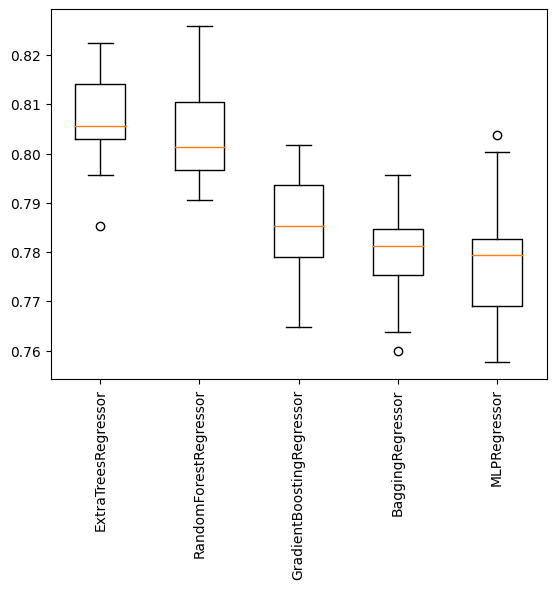

In [14]:
plt.boxplot(Results_df[['ExtraTreesRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor','BaggingRegressor', 'MLPRegressor']], labels=['ExtraTreesRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor','BaggingRegressor', 'MLPRegressor'])
plt.xticks(rotation = 90)
plt.show()

* The random forest regressor seems to be the best model for this dataset, as it has higher minimum and maximum values than the others, even though it has more variance.

* Optimize the RandomForestRegressor model

In [15]:
"""from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor()

param_grid = {
    "n_estimators": np.arange(100, 200, 20),
    "max_depth": np.arange(3, 15, 1),
    "min_samples_split": np.arange(2, 10, 1),
    "min_samples_leaf": np.arange(1, 8, 1),
    "min_weight_fraction_leaf": np.arange(0.01, 0.5, 0.01),
    "bootstrap": [True],
    "criterion":['squared_error', 'absolute_error']
}
cv = RandomizedSearchCV(rfr, param_distributions=param_grid, cv = kf, n_jobs=-1, verbose=1, refit=True, n_iter=40)

cv.fit(X_train_scaled, y_train)"""

'from sklearn.model_selection import RandomizedSearchCV\n\nrfr = RandomForestRegressor()\n\nparam_grid = {\n    "n_estimators": np.arange(100, 200, 20),\n    "max_depth": np.arange(3, 15, 1),\n    "min_samples_split": np.arange(2, 10, 1),\n    "min_samples_leaf": np.arange(1, 8, 1),\n    "min_weight_fraction_leaf": np.arange(0.01, 0.5, 0.01),\n    "bootstrap": [True],\n    "criterion":[\'squared_error\', \'absolute_error\']\n}\ncv = RandomizedSearchCV(rfr, param_distributions=param_grid, cv = kf, n_jobs=-1, verbose=1, refit=True, n_iter=40)\n\ncv.fit(X_train_scaled, y_train)'

In [18]:
# the best params found are

best_params = {'n_estimators': 160,
 'min_weight_fraction_leaf': 0.02,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'criterion': 'squared_error',
 'bootstrap': True}

# recreating model

rfr = RandomForestRegressor()
rfr.set_params(**best_params)

rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                      min_weight_fraction_leaf=0.02, n_estimators=160)

# Creating a comparison model using deep learning with tensorflow

* Import modules

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [65]:
data.shape, X_train.shape, y_train.shape

((20640, 9), (13209, 8), (13209,))

* create a sequential model

In [94]:
model = Sequential(
    [   
        layers.Input(shape=(8)),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.25),
        layers.BatchNormalization(),
        layers.Dense(1, activation='relu')
    ]
)




In [95]:
model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])

In [96]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 32)                288       
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_16 (Bat  (None, 8)                32        
 chNormalization)                                    

* set early stopping

In [97]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)

In [98]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=100, callbacks=[early_stop])

Epoch 1/100
133/133 [==============================] - 4s 10ms/step - loss: 2.7180 - mae: 1.3636 - val_loss: 5.0400 - val_mae: 1.9723
Epoch 2/100
133/133 [==============================] - 1s 7ms/step - loss: 1.6418 - mae: 1.0297 - val_loss: 0.9102 - val_mae: 0.7501
Epoch 3/100
133/133 [==============================] - 1s 6ms/step - loss: 1.0146 - mae: 0.7832 - val_loss: 0.6799 - val_mae: 0.6340
Epoch 4/100
133/133 [==============================] - 1s 7ms/step - loss: 0.7008 - mae: 0.6232 - val_loss: 0.6039 - val_mae: 0.5783
Epoch 5/100
133/133 [==============================] - 1s 6ms/step - loss: 0.6030 - mae: 0.5704 - val_loss: 0.5687 - val_mae: 0.5514
Epoch 6/100
133/133 [==============================] - 1s 7ms/step - loss: 0.5328 - mae: 0.5286 - val_loss: 0.5130 - val_mae: 0.5256
Epoch 7/100
133/133 [==============================] - 1s 7ms/step - loss: 0.5115 - mae: 0.5145 - val_loss: 0.5356 - val_mae: 0.5161
Epoch 8/100
133/133 [==============================] - 1s 7ms/step -

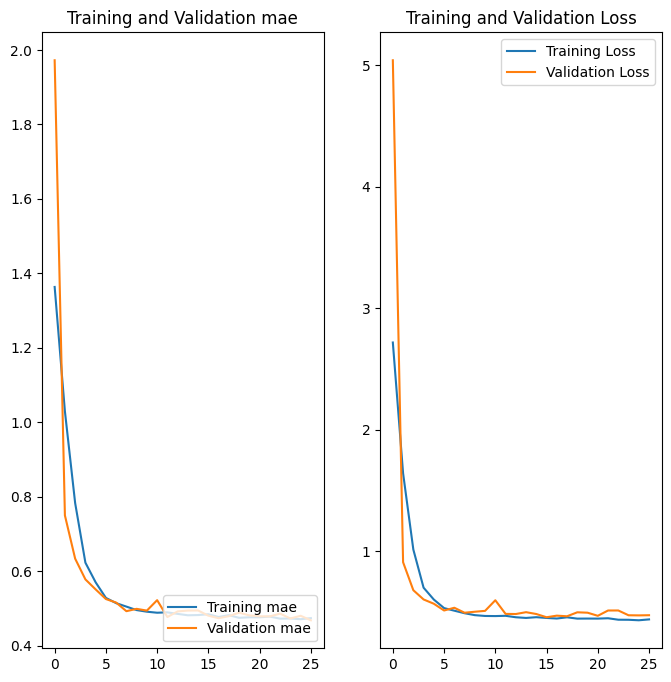

In [99]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['mae']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training mae')
plt.plot(epochs_range, val_acc, label='Validation mae')
plt.legend(loc='lower right')
plt.title('Training and Validation mae')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Evaluating both models

In [101]:
# RandomForestRegressor
rfr_preds = rfr.predict(X_test_scaled)
print('Random Forest Regressor')
# scores other than the .score() method
from sklearn import metrics

R2_score = metrics.r2_score(y_test, rfr_preds)
print(f'R2 score: {R2_score}')

mae_score = metrics.mean_absolute_error(y_test, rfr_preds)
print(f'mae score: {mae_score}')

mae_perc_score = metrics.mean_absolute_percentage_error(y_test, rfr_preds)
print(f'mae perc score: {mae_perc_score}\n')


# Deep learning model
deep_preds = model.predict(X_test)
print('Deep learning model')
R2_score = metrics.r2_score(y_test, deep_preds)
print(f'R2 score: {R2_score}')

mae_score = metrics.mean_absolute_error(y_test, deep_preds)
print(f'mae score: {mae_score}')

mae_perc_score = metrics.mean_absolute_percentage_error(y_test, deep_preds)
print(f'mae perc score: {mae_perc_score}')

Random Forest Regressor
R2 score: 0.662471625634023
mae score: 0.4710739640227413
mae perc score: 0.2824659079433176

129/129 [==============================] - 1s 4ms/step
Deep learning model
R2 score: 0.6547826070891611
mae score: 0.46165741198977756
mae perc score: 0.2576847036599611


# Conclusion

## Conclusion

Two models were created using the boson housing dataset provided by sklearn with shape (20640, 9). The models were a Random Forest Regressor and a deep learning model. The following scores were obtained:

| Model | R2 score | MAE score | MAE perc score |
|---|---|---|---|
| Random Forest Regressor | 0.662471625634023 | 0.4710739640227413 | 0.2824659079433176 |
| Deep learning model | 0.6547826070891611 | 0.46165741198977756 | 0.2576847036599611 |

The deep learning model had a slightly lower R2 score than the Random Forest Regressor, but a slightly lower MAE score. This suggests that the deep learning model may be slightly more accurate, but it is also less robust to noise.

The deep learning model required less preprocessing than the Random Forest Regressor, but it took longer to train. The deep learning model also requires a larger dataset to achieve its best performance.

The Random Forest Regressor required more preprocessing, but it was faster to train. The Random Forest Regressor can also be more accurate if the best parameters are found using a grid search, but this can be time-consuming.

**Overall, the deep learning model is a good choice if you have a large dataset and you are willing to wait for it to train. The Random Forest Regressor is a good choice if you have a smaller dataset and you need to train the model quickly.**
